In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/wine.csv',header=None)
X = df.iloc[:,0:12]
y = df.iloc[:,12]


In [2]:
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)


In [3]:
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
#모델 컴파일
model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])


In [5]:
#모델을 실행합니다
history = model.fit(X_train,y_train,epochs=50,batch_size=500,
                    validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 2s 34ms/step - loss: 0.2826 - accuracy: 0.9251 - val_loss: 0.2614 - val_accuracy: 0.9238
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2488 - accuracy: 0.9281 - val_loss: 0.2403 - val_accuracy: 0.9215
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2300 - accuracy: 0.9299 - val_loss: 0.2293 - val_accuracy: 0.9254
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2219 - accuracy: 0.9302 - val_loss: 0.2254 - val_accuracy: 0.9192
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2165 - accuracy: 0.9284 - val_loss: 0.2176 - val_accuracy: 0.9231
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2113 - accuracy: 0.9302 - val_loss: 0.2149 - val_accuracy: 0.9238
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2074 - accuracy: 0.9299 - val_loss: 0.2118 - val_accuracy: 0.9285
Epoch 8/50
8/8 [=================

In [6]:
#테스트 결과를 출력합니다.
score = model.evaluate(X_test,y_test)
print('Test accuracy : ',score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9554
Test accuracy :  0.9553846120834351


In [7]:
#모델이 저장되는 조건을 설정합니다.
from keras.callbacks import ModelCheckpoint
modelpath = "../data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=modelpath,verbose=1)

In [8]:
#모델을 실행합니다.
history = model.fit(X_train,y_train,epochs=50,batch_size=500,
                    validation_split=0.25,verbose=0,callbacks=[checkpoint])



Epoch 1: saving model to ../data/model\01-0.9538.hdf5

Epoch 2: saving model to ../data/model\02-0.9515.hdf5

Epoch 3: saving model to ../data/model\03-0.9523.hdf5

Epoch 4: saving model to ../data/model\04-0.9577.hdf5


D:\machine_learning\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to ../data/model\05-0.9577.hdf5

Epoch 6: saving model to ../data/model\06-0.9546.hdf5

Epoch 7: saving model to ../data/model\07-0.9562.hdf5

Epoch 8: saving model to ../data/model\08-0.9631.hdf5

Epoch 9: saving model to ../data/model\09-0.9600.hdf5

Epoch 10: saving model to ../data/model\10-0.9585.hdf5

Epoch 11: saving model to ../data/model\11-0.9646.hdf5

Epoch 12: saving model to ../data/model\12-0.9685.hdf5

Epoch 13: saving model to ../data/model\13-0.9692.hdf5

Epoch 14: saving model to ../data/model\14-0.9631.hdf5

Epoch 15: saving model to ../data/model\15-0.9708.hdf5

Epoch 16: saving model to ../data/model\16-0.9623.hdf5

Epoch 17: saving model to ../data/model\17-0.9708.hdf5

Epoch 18: saving model to ../data/model\18-0.9623.hdf5

Epoch 19: saving model to ../data/model\19-0.9638.hdf5

Epoch 20: saving model to ../data/model\20-0.9638.hdf5

Epoch 21: saving model to ../data/model\21-0.9654.hdf5

Epoch 22: saving model to ../data/model\22-0.9638.hd

In [9]:
#테스트 결과를 출력합니다.
score = model.evaluate(X_test,y_test)
print('Test accuracy : ',score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9785
Test accuracy :  0.9784615635871887


In [10]:
#그래프 확인을 위한 긴 학습
history = model.fit(X_train,y_train,epochs=2000,batch_size=500,
                    validation_split=0.25)


Epoch 1/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0801 - accuracy: 0.9779 - val_loss: 0.0714 - val_accuracy: 0.9738
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0780 - accuracy: 0.9792 - val_loss: 0.0714 - val_accuracy: 0.9762
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0797 - accuracy: 0.9769 - val_loss: 0.0720 - val_accuracy: 0.9746
Epoch 4/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0790 - accuracy: 0.9787 - val_loss: 0.0703 - val_accuracy: 0.9754
Epoch 5/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9790 - val_loss: 0.0695 - val_accuracy: 0.9769
Epoch 6/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0777 - accuracy: 0.9787 - val_loss: 0.0699 - val_accuracy: 0.9754
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0773 - accuracy: 0.9790 - val_loss: 0.0725 - val_accuracy: 0.9738
Epoch 8/2000
8/8 [=

In [13]:
# history에 저장된 학습 결과를 확인해 보겟습니다.
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.080114,0.977932,0.071362,0.973846
1,0.078048,0.979215,0.071421,0.976154
2,0.079690,0.976905,0.072023,0.974615
3,0.078991,0.978702,0.070320,0.975385
4,0.078442,0.978958,0.069452,0.976923
...,...,...,...,...
1995,0.027223,0.990506,0.037435,0.986923
1996,0.024756,0.992558,0.031925,0.988462
1997,0.023177,0.993072,0.031469,0.990000
1998,0.023662,0.993328,0.030445,0.990000


In [15]:
#y_vloss에 검증셋의 오차를 저장합니다.
y_vloss = hist_df['val_loss']
#y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist_df['loss']


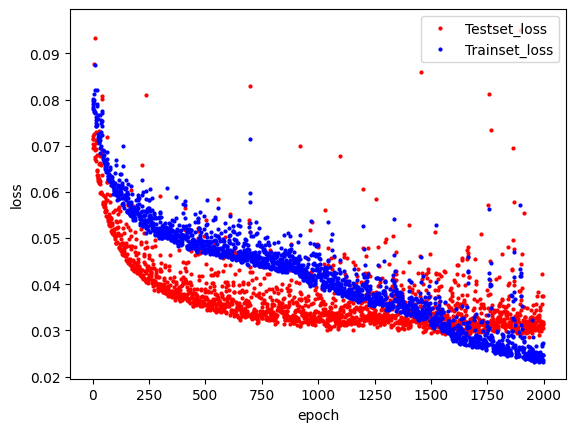

In [18]:
#x 값을 저장하고 검증셋의 오차를 빨간색으로,학습셋의 오차를 파란색으로 표시합니다.
import matplotlib.pyplot as plt
import numpy as np
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,'o',c='red',markersize=2,label='Testset_loss')
plt.plot(x_len,y_loss,'o',c='blue',markersize=2,label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [19]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#학습이 언제 자동 중단될지 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

In [20]:
#최적화 모델이 저장될 폴더와 모델이름을 정합니다.
modelpath = "../data/model/Ch14-4-bestmodel.hdf5"


In [21]:
#최적화 모델을 업데이트 하고 저장합니다.
checkpoint = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                             verbose=0,save_best_only=True)


In [22]:
#모델을 실행합니다.
history = model.fit(X_train,y_train,epochs=2000,batch_size=500,
                    validation_split=0.25,verbose=1,callbacks=[early_stopping_callback,checkpoint])

Epoch 1/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0332 - val_accuracy: 0.9877
Epoch 2/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0489 - val_accuracy: 0.9831
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0427 - val_accuracy: 0.9854
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0306 - accuracy: 0.9887 - val_loss: 0.0376 - val_accuracy: 0.9862
Epoch 5/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0146 - accuracy: 0.9940

D:\machine_learning\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 9ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0309 - accuracy: 0.9892 - val_loss: 0.0317 - val_accuracy: 0.9900
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0312 - val_accuracy: 0.9900
Epoch 8/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.0340 - val_accuracy: 0.9892
Epoch 9/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0242 - accuracy: 0.9933 - val_loss: 0.0293 - val_accuracy: 0.9908
Epoch 10/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0251 - accuracy: 0.9931 - val_loss: 0.0299 - val_accuracy: 0.9915
Epoch 11/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9915 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 12/2000
8/8 [============

In [23]:
score = model.evaluate(X_test,y_test)
print('Test accuracy : ',score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9885
Test accuracy :  0.9884615540504456
